In [1]:
from cProfile import label
import random

import numpy as np

from deap import algorithms

from deap import base

from deap import creator

from deap import tools
import matplotlib.pyplot as plt


MAX_ITEM = 100


# To assure reproductibility, the RNG seed is set prior to the items

# dict initialization. It is also seeded in main().

random.seed(64)
# get the individual
# file = open("/Users/chenze/Desktop/AIML426/A1/knapsack-data/100_995")
file = open("10_269")
# file = open("/Users/chenze/Desktop/AIML426/A1/knapsack-data/23_10000")
header = file.readline().split(" ")
n = int(header[0])
capacity = int(header[1])
MAX_WEIGHT = capacity

items = {}
for i in range(n):
    line = file.readline().split(" ")
    # Append tuple to candidates, giving it a randomly accessible name i
    items[i] = (int(line[0]), int(line[1]))

NBR_ITEMS = len(items)
IND_INIT_SIZE = len(items)  # 基因编码位数
print("item", len(items), "weight", MAX_WEIGHT)


item 10 weight 269


gen	nevals	avg    	std    	min	max  
0  	100   	2877.11	4442.66	0  	10000
1  	81    	852.93 	2510.52	0  	10000
2  	79    	170.42 	62.8641	5  	290  
3  	83    	152.43 	72.0889	0  	290  
4  	85    	129.05 	79.4624	0  	290  
5  	82    	126.22 	85.0959	0  	290  
6  	82    	129.01 	81.1548	0  	290  
7  	76    	125.115	86.9559	0  	294  
8  	73    	122.92 	84.8664	0  	294  
9  	77    	121.82 	100.26 	0  	294  
10 	80    	92.535 	96.4755	0  	294  
11 	84    	66.45  	91.2787	0  	294  
12 	75    	58.105 	88.3991	0  	294  
13 	80    	69.455 	93.849 	0  	294  
14 	74    	68.93  	92.2801	0  	294  
15 	78    	77.255 	97.0542	0  	294  
16 	79    	69.17  	90.5887	0  	294  
17 	84    	66.2   	89.9252	0  	294  
18 	76    	67.465 	94.4104	0  	294  
19 	76    	101.365	96.7896	0  	294  
20 	80    	83.795 	100.174	0  	294  
21 	78    	118.835	94.5135	0  	294  
22 	74    	114.7  	102.004	0  	294  
23 	78    	134.765	109.483	0  	294  
24 	81    	172.89 	113.748	0  	294  
25 	76    	209.31 	91.2974	0  	294  
2

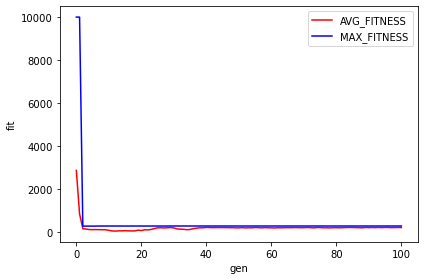

In [16]:

creator.create("Fitness", base.Fitness, weights=(-1.0,1.0))

creator.create("Individual", list, fitness=creator.Fitness)


toolbox = base.Toolbox()


# Attribute generator

toolbox.register("Binary", random.randint, 0, 1)

# Structure initializers

toolbox.register("individual", tools.initRepeat, creator.Individual,

                 toolbox.Binary, IND_INIT_SIZE)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)


def evalKnapsack(individual):

    weight = 0.0
    value = 0.0
    for n, item in enumerate(individual):
        weight += items[n][1]*item
        value += items[n][0]*item
    if weight > MAX_WEIGHT:
        return 10000,0# Ensure overweighted bags are dominated

    return weight,value



# toolbox.register("mate", crossover)
toolbox.register('mate', tools.cxOnePoint)
# toolbox.register("mutate", mutSet)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)

toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evalKnapsack)


def main():

    random.seed(0)

    NGEN = 100

    Population_size = 100

    LAMBDA = 100

    CXPB = 0.8

    MUTPB = 0.01

    pop = toolbox.population(n=Population_size)

    hof = tools.ParetoFront()

    stats = tools.Statistics(lambda ind: ind.fitness.values)

    stats.register("avg", np.mean)

    stats.register("std", np.std)

    stats.register("min", np.min)

    stats.register("max", np.max)

    s, logbook = algorithms.eaMuPlusLambda(pop, toolbox, Population_size, LAMBDA, 
                                           CXPB, MUTPB, NGEN, stats,
                                           halloffame=hof)
    # s, logbook  = algorithms.eaSimple(pop, toolbox=toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, verbose=False,halloffame=hof)
    return pop, stats, hof, logbook


# def main():
if __name__ == "__main__":

    pop, stats, hof, logbook = main()

    print("The best individual :", hof[-1])

    # print(len(pop))

    # print(len(hof))
    print("Optimum packing weight and value (best fitness) :",
          evalKnapsack(hof[-1]))
    avg = logbook.select('avg')
    max = logbook.select('max')
    gen = logbook.select('gen')
    min  = logbook.select('min')
    
    plt.plot(gen,avg,'r-',label = "AVG_FITNESS")
    plt.plot(gen,max,'b-',label = 'MAX_FITNESS')
    plt.legend(loc =  'best')
    plt.xlabel('gen')
    plt.ylabel('fit')
    plt.tight_layout()
    plt.show()
    
# main()
 

In [21]:
import pandas as pd
import numpy as np
from copy import deepcopy
from distutils.command.build_scripts import first_line_re
from tkinter.tix import COLUMN
# Import deque for the stack structure, copy for deep copy nodes
from collections import deque

class Knapsack:
    '''For each instance, we have following fields: 
            the 1st line of the  file contains the number of items N and the knapsack capacity C.,
            2nd onwards contains the Value and Weight of each item, separated by a space.
    '''
    # main constructor 
    def __init__(self, M, capacity, items):
        '''N is the number of items, i.e. len(items)'''
        self.M = M
        self.capacity = capacity
        self.items = items
        self.items_dict  = {}
        i = 0
        for x in self.items.to_records(index=False):
            self.items_dict[i] = tuple(x)
            i += 1
        
    @classmethod
    def constructFromFile(cls, filePath):
        '''Read from file and construct an instance of Knapsack'''
        with open(filePath, 'r') as file:
            first_line = file.readline()
            N,capacity = int(first_line.split(' ')[0]),int(first_line.split(' ')[1])
            # first_line = first_line.split(' ')
        itemsdf = pd.read_csv(filePath,delim_whitespace=True, skiprows=range(1), header=None)
        itemsdf.columns = ['Value', 'Weight']
        
        # add a index column for the items
        # items.index = items.index + 1
        return cls(N, capacity, itemsdf)
    
    
    def __str__(self):
        return 'N = {}, capacity = {}, \nitems =\n {}'.format(self.M, self.capacity, self.items)    
ds_10_269 = Knapsack.constructFromFile('10_269')
# print(ten_269)
ds_10_269.items_dict
    

{0: (55, 95),
 1: (10, 4),
 2: (47, 60),
 3: (5, 32),
 4: (4, 23),
 5: (50, 72),
 6: (8, 80),
 7: (61, 62),
 8: (85, 65),
 9: (87, 46)}

In [25]:
#    This file is part of DEAP.
#
#    DEAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    DEAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

IND_INIT_SIZE = 5
MAX_ITEM = 50
MAX_WEIGHT = 50
NBR_ITEMS = ds_10_269.M

# To assure reproducibility, the RNG seed is set prior to the items
# dict initialization. It is also seeded in main().
random.seed(64)

# # Create the item dictionary: item name is an integer, and value is 
# # a (weight, value) 2-tuple.
# items = {}
# # Create random items and store them in the items' dictionary.
# for i in range(NBR_ITEMS):
#     items[i] = (random.randint(1, 10), random.uniform(0, 100))
items = ds_10_269.items_dict